# Simulation of  Powder X-Ray  Diffraction
### Computational Physics I 
#### Brian Kerlin


## What is Powder X-Ray  Diffraction?

X-ray powder diffraction (XRD) is an analytical technique used to assist in the identification of the phases of a crystalline material. Additionally, it can provide information on the dimensions of the unit cell of the material. Notably, the technique differs from X-Ray crystallography due to the use of a finely ground and homogenized sample instead of a single, well-ordered cystral. 

![alt text](XRD_schem.jpg "Title")
Powder XRD Schematic. (3)

![alt text](examplexrd.png "Title")
XRD example output

#### Purposes of Powder XRD

- characterization of crystalline materials
- sample identification
- determination of unit cell dimensions
- measure of purity of sample

## Brief Crystal Structure Background

Crystal sturcture is defined as the particular repeating arrangement of atoms, molecules, or ions within a crystal. The particular crystal structure of a material is the minimum-energy arrangement of its constituent components in space. 

#### Unit cell
The structure of a crystal is defined with respect to a unit cell. As the entire crystal consists of repeating unit cells, this definition is sufficient to represent the entire crystal. The length of an edges of the unit cells is known as a lattice parameter.  Examples of two forms of cubic unit cells:



<img src="bcc_fcc.png" alt="Drawing" style="width: 300px;"/>

<img src="ya9-1.jpg" alt="Drawing" style="width: 500px;"/>

#### Atom Coordinates and Crystal Planes
Within the unit cell, the positions of atoms are denoted using fractional coordinates measured from a reference point.  When modeling the system, only the smallest asymmetrical set is needed. 

<img src="coordunitcell.png" alt="Drawing" style="width: 300px;"/>

Planes in a crystal can be specified using a notation called Miller indices. The Miller index is indicated by the notation [hkl] where h, k, and l are reciprocals of the plane with the x, y, and z axes. In XRD, the X-ray is a plane wave that is fired at the crystal structure at all angles to ensure 

<img src="graphics11.png" alt="Drawing" style="width: 300px;"/>

## Key Equations

#### Bragg's Law
$$n\lambda = 2dsin\theta$$

Bragg's law gives the angles at which the reflective, circular waves constructive interference from a crystal lattice. The angles depend on the wavelength of the incoming radition and the $d$, interplanar spacing.

<img src="bragg-1.jpg" alt="Drawing" style="width: 300px;"/>
<img src="bragg-2.jpg" alt="Drawing" style="width: 300px;"/>

#### Scattering Vector

$$Q = \frac{4\pi}{\lambda}sin\theta$$

#### Atomic Form Factor

- is a measure of the scattering amplitude from an isolated atom. scattering amplitude is the amplitude of the outgoing amplitude of the spherical wave relative to the incoming plane wave. X-Rays are scattered by the electron cloud of the atom.

General Equation: $$f(Q) = \int \rho(r)e^{-2\pi i(Q*r)}d^3r$$

$\rho$(r) is the spatial density of the atom and $Q$ is the momentum transfer between the waves.

Approximated Form: $$f(Q) = \sum \limits _{i=1}^{4}a_i e^{-b_i(\frac{Q}{4\pi})^2)}+c$$

$a_i$,$b_i$,$c$ are experimentally calculated constants for element $i$. Data for constants (7).

#### Sturcture Factor

- A structure factor is a description of how a material scatters radiation. It represents the diffracted waves, which collide with a detector and leave a diffraction pattern. 

General Equation: $$F(hkl) = \sum \limits _{j}f_j e^{-2\pi i(hx_j+ky_j+\ell z_j)}$$

$f_j$ is the atomic form factor for and element $j$. The rest of the equation is expression of where each atomic is located within a unit cell.

### The cell below defines a number a variables needed to simulate powder XRD. Additionally, data needed to calculate the atomic form factors for each element has been imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math



#constant - all lattices
lambda_xray = 1.54056 #Ang # copper-K-alpha source

atom_pos_fcc = [[0.0, 0.0, 0.0], [0, 0.5, 0.5],[0.5, 0.0, 0.5], [0.5, 0.5, 0]] #coordinates of fcc unit cell
atom_pos_bcc = [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]] #coordinates of bcc unit cell
atom_pos_hcp = [[0.0, 0.0, 0.0], [0.333330, 0.6666667, 0],[0.666670,0.333340, 0.5], [0.333330, 0.666670, 0.382000],[0.666670, 0.333340, 0.882000]]


#Atomic Scattering Data

ats_data_df = (pd.read_csv(r'C:\Users\User\ComputationalPhysics300-master\Projects\Atomic_Form_Parameters.csv'))
ats_data = ats_data_df.set_index('Column1').T.to_dict('list')



def hkl_lists():
    "create arrays for h,k,l to cycle through all of the different combinations"
    h_list = []
    k_list = []
    l_list = []
    for h in list(range(7)):
        for k in list(range(7)):
            for l in list(range(7)):
    
                h_i= h - 3
                k_i= k - 3
                l_i= l - 3
                
                if h_i == 0 and k_i == 0 and l_i ==0:
                    break
                else:
                    h_list.append(h_i)
                    k_list.append(k_i)
                    l_list.append(l_i)
    return h_list, k_list, l_list

h_list, k_list, l_list = hkl_lists()


def get_parameter(elem):
    g = ats_data[elem]
    a1,b1,a2,b2,a3,b3,a4,b4,c = g[0],g[1],g[2],g[3],g[4],g[6] ,g[6],g[7],g[8]  
    return [[a1,b1],[a2,b2],[a3,b3],[a4,b4]],c

In C:\ProgramData\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

### Function to calculate atomic form factor. Comparison of output to plot from literature.

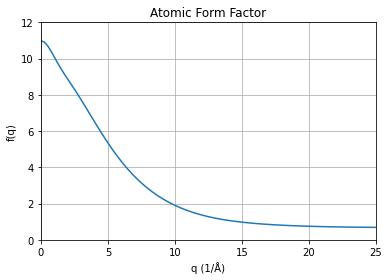

In [2]:

def atomic_scattering_f(q,elm):
    
    #using paramaters (param and C) for a given element and a scattering vector (q),
    #output the atomic scattering factor for a given single atom
    #scattering amplitude is the probability amplitude of the outgoing spherical wave relative to the incoming plane wave in a stationary-state scattering process
    f_atm = 0
    param, c = get_parameter(elem)
    for i in [0,1,2,3]:
        
        f_part = param[i][0]*np.exp(-param[i][1]*((q/(4*np.pi))**2)) #summation 
        #print(f_part)
        f_atm = f_atm+f_part
        
    f_atm = f_atm+c
    
    return f_atm

momentum_transfer = np.linspace(0, 25, 100)  #1/angstrom

atomic_form_fact = []
elem = "'Na'"

for i in range(len(momentum_transfer)):
    
    atomic_form_fact.append(atomic_scattering_f(momentum_transfer[i],elem))


fig = plt.figure()
plt.xlabel("q (1/Å)")
plt.ylabel("f(q)")      
plt.title("Atomic Form Factor")
plt.ylim([0,12])
plt.xlim([0,25])
plt.grid()
plt.plot(momentum_transfer, atomic_form_fact)     
#plt.xlim([0, 25])



<img style="float: left;" src="aff_na.png" alt="Drawing" style="width: 1500px;"/>

### Functions to calculate Structure Factors for single element/ion crystals or for crystals with 2 elements/ions.


In [82]:
def structure_factor(atom_pos, h, k, l, elem, theta, lambda_xray):
    #input: postions of atoms in unit cell, orientation cell to x-ray, and q
    #output:structure factor, unit of scattering by a single electron (2.82*10^{-15}} m)
    
    rea = 0
    ima = 0
    q = (4*np.pi/lambda_xray)*np.sin(theta) #calc momentum transfer
    f_atm = atomic_scattering_f(q, elem)
    for r in atom_pos:
        rea = rea + np.cos(2*np.pi*(r[0]*h+r[1]*k+r[2]*l))
        ima = ima + np.sin(2*np.pi*(r[0]*h+r[1]*k+r[2]*l))
       
    f = f_atm*(complex(rea, ima))
    return f

def structure_factor_2_elem(atom_pos1,atom_pos2, h, k, l, elem1, elem2, theta, lambda_xray):
    #input: postions of atoms in unit cell, orientation cell to x-ray, and q
    #output:structure factor, unit of scattering by a single electron (2.82*10^{-15}} m)
    
    rea = 0
    ima = 0
    q = (4*np.pi/lambda_xray)*np.sin(theta) #calc momentum transfer
    f_atm1 = atomic_scattering_f(q,elem1)
    f_atm2 = atomic_scattering_f(q,elem2)
    f_st = 0
    rea_1,rea_2,ima_2,ima_1 = 0,0,0,0
    for j in atom_pos1:
        rea_1 = rea_1 + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima_1 = ima_1 + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))

    F_1 = f_atm1*(complex(rea_1, ima_1))

    for j in atom_pos2:
        rea_2 = rea_2 + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima_2 = ima_2 + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
      
    F_2 = f_atm2*(complex(rea_2, ima_2))
    
    F_st = F_1 + F_2
 
    
    return F_st




### The next two cells contain the functions needed to output the simulated XRD for cubic lattices. Whether the system is BCC of FCC is dependent on the atomic postion input(s).

In [103]:
   
def cubic(atom_pos, h_list, k_list, l_list, elem, lambda_xray,lp):
    #output 2theta vs. intensity 
    #for cubic, single atom systems
    
    f_result = np.zeros(1120)
    t2 = np.arange(0, 112 , 0.1) #2theta
    t2_hkl = []   #miller indices of peaks

    for i in range(len(h_list)):
        hkl = [h_list[i], k_list[i], l_list[i]]
        d_hkl = lp/np.sqrt(hkl[0]**2+hkl[1]**2+hkl[2]**2)   #interplanar spacing for cubic lattice
        theta = np.arcsin(lambda_xray/(2*d_hkl))         #bragg equation to find theta
        theta_degrees = np.rad2deg(theta) # degrees
        b = math.isnan(theta_degrees)
        if b == True:
            continue
        if lambda_xray/(2*d_hkl) > 1 or lambda_xray/(2*d_hkl) <-1:
            break
        
        theta_times_2 = int(round(2*theta_degrees, 0))
        F = structure_factor(atom_pos, h_list[i], k_list[i], l_list[i], elem, theta, lambda_xray)
        #print(F)
        #print(hkl)
        PF = 1 +np.cos(2*theta)**2 #polarization_factor
        LF = 1/(np.cos(theta)*np.sin(theta)**2)
        F_adj = PF*F*LF
        if(f_result[theta_times_2] != 0): #if theta already there add to it, multipliticity
            f_result[theta_times_2] = f_result[theta_times_2] + abs(F_adj)**2
            continue
        else:
            f_result[theta_times_2] = abs(F_adj)**2
            
        max_value = np.max(f_result) #highest intensity in xrd
        if(f_result[theta_times_2] < 0.0000000000001*max_value): #if peak is significantly smaller than the max intensity rmeove
             f_result[theta_times_2] = 0
        else:
            hkl_pos =  [abs(ele) for ele in hkl] #make all hkl labels positive, just looks cleaner
            t2_hkl.append([int(round(2*theta_degrees, 0)), hkl_pos]) #for significant values record their hkls to label points
    return f_result, t2_hkl
    

In [104]:
def cubic2(atom_pos1,atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp):
    #output 2theta vs. intensity 
    #for single atom systems
    
    f_result = np.zeros(1120)
    t2 = np.arange(0, 112 , 0.1) #2theta
    t2_hkl = []   #miller indices of peaks

    for i in range(len(h_list)):
        hkl = [h_list[i], k_list[i], l_list[i]]
        d_hkl = lp/np.sqrt(hkl[0]**2+hkl[1]**2+hkl[2]**2)   #interplanar spacing for cubic lattice
        theta = np.arcsin(lambda_xray/(2*d_hkl))         #bragg equation to find theta
        theta_degrees = np.rad2deg(theta) # degrees
        b = math.isnan(theta_degrees)
        
        if b == True:
            continue
        if lambda_xray/(2*d_hkl) > 1 or lambda_xray/(2*d_hkl) <-1:
            break
        theta_times_2 = int(round(2*theta_degrees, 0))
        F = structure_factor_2_elem(atom_pos1,atom_pos2, h_list[i], k_list[i], l_list[i], elem1, elem2, theta, lambda_xray)
        PF = 1 +np.cos(2*theta)**2 #polarization_factor
        LF = 1/(np.cos(theta)*np.sin(theta)**2)
        F_adj = PF*F*LF
    
        if(f_result[theta_times_2] != 0): #if theta already there add to it, multipliticity
            f_result[theta_times_2] = f_result[theta_times_2] + abs(F_adj)**2
            continue
        else:
            f_result[theta_times_2] = abs(F_adj)**2
            
        max_value = np.max(f_result) #highest intensity in xrd
        if(f_result[theta_times_2] < 0.0001*max_value): #if peak is significantly smaller than the max intensity rmeove
             f_result[theta_times_2] = 0
        else:
            hkl_pos =  [abs(ele) for ele in hkl] #make all hkl labels positive, just looks cleaner
            t2_hkl.append([int(round(2*theta_degrees, 0)), hkl_pos]) #for significant values record their hkls to label points
    return f_result, t2_hkl
    

atom_pos1 = [[0, 0, 0], [0.5, 0.5, 0],[0.5, 0.0, 0.5], [0, 0.5, 0.5]] #coordinates of bcc unit cell    ---NA
atom_pos2 = [[0.5, 0.5, 0.05], [0., 0.5, 0],[0.5, 0.0, 0], [0, 0, 0.5]] #coordinates of fcc unit cell     --CL


### Comparison of simulation of XRD for Silver FCC to literature plot

(35.0, 90.0)

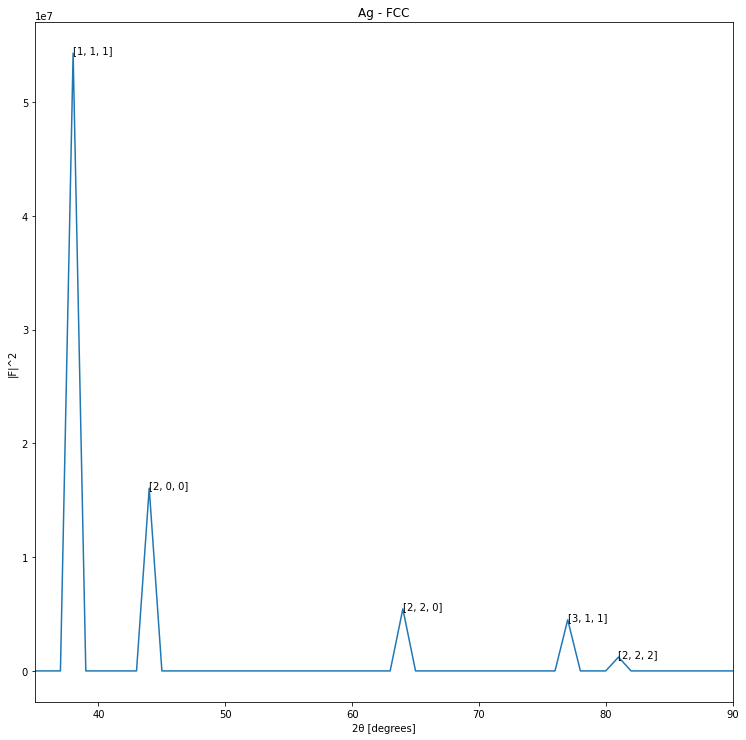

In [105]:
elem = "'Ag'"
lp = 4.09
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = cubic(atom_pos_fcc, h_list, k_list, l_list, elem, lambda_xray,lp) #y_value for plot, labels

x_min, x_max = 35, 90
fig = plt.figure()
plt.xlabel("2θ [degrees]")

plt.ylabel("|F|^2") 
plt.title("Ag - FCC")
plt.rcParams["figure.figsize"]=(12.5, 12.5)

for i in hkl_hits:
    if i[0] > x_max:
        continue
    else:
        plt.text(i[0], final_results[i[0]], i[1])

plt.plot(t2*10, final_results) 
plt.xlim([x_min,x_max])

<img style="float: left;" src="ag_fcc.png" alt="Drawing" style="width: 1500px;"/>

source (6)

### Comparison of simulation of XRD for Iron BCC to literature plot

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arcsin
  if sys.path[0] == '':


(0.0, 114.7)

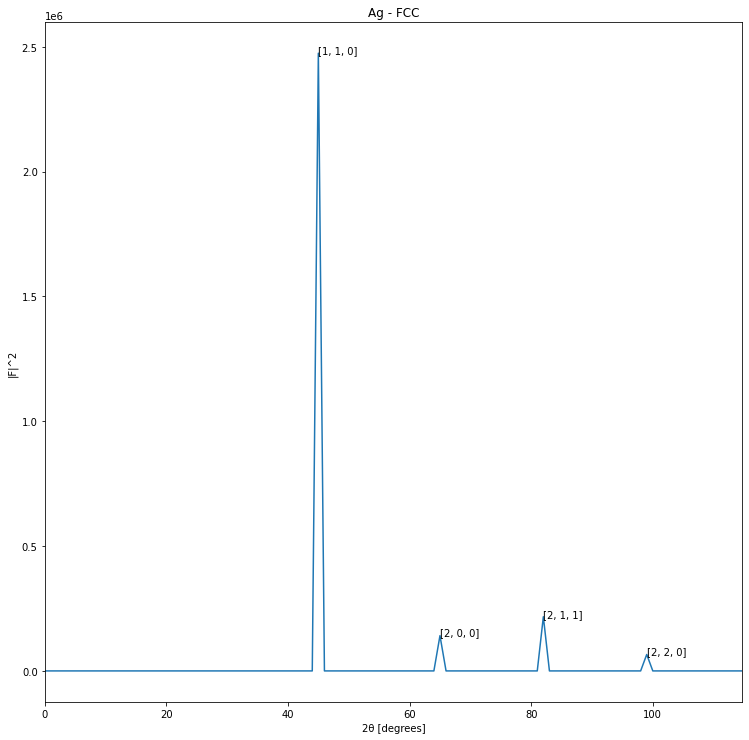

In [106]:
elem = "'Fe'"
lp = 2.866
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = cubic(atom_pos_bcc, h_list, k_list, l_list, elem, lambda_xray,lp) #y_value for plot, labels

x_min, x_max = 0, 114.7
fig = plt.figure()
plt.xlabel("2θ [degrees]")

plt.ylabel("|F|^2") 
plt.title("Ag - FCC")
plt.rcParams["figure.figsize"]=(12.5, 12.5)

for i in hkl_hits:
    if i[0] > x_max:
        continue
    else:
        plt.text(i[0], final_results[i[0]], i[1])

plt.plot(t2*10, final_results) 
plt.xlim([x_min,x_max])

<img style="float: left;" src="iron_bcc.jpg" alt="Drawing" style="width: 1500px;"/>

Source (8)

(20.0, 90.0)

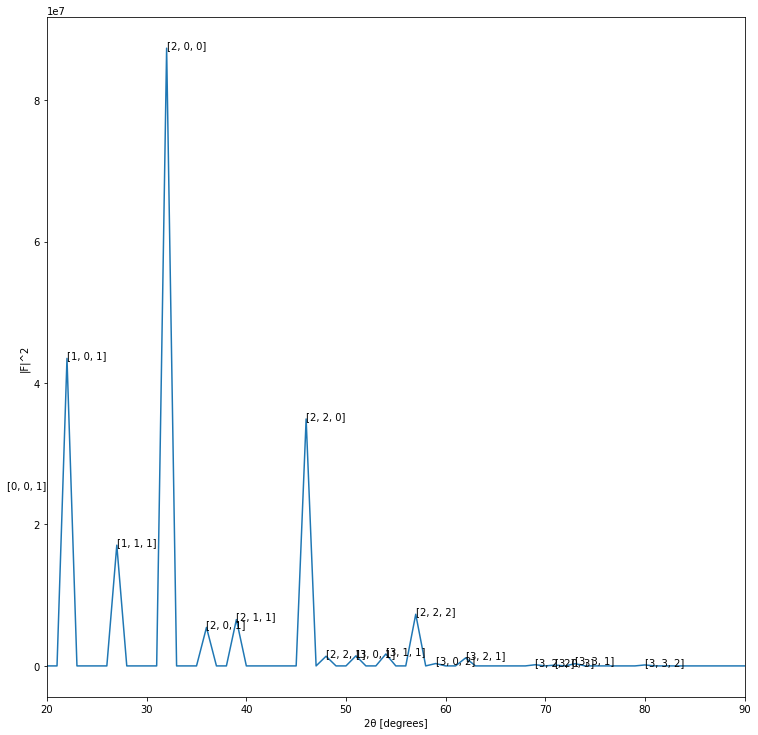

In [107]:
atom_pos1 = [[0, 0, 0], [0.5, 0.5, 0],[0.5, 0.0, 0.5], [0, 0.5, 0.5]] #coordinates of fcc unit cell    ---NA
atom_pos2 = [[0.5, 0.5, 0.05], [0., 0.5, 0],[0.5, 0.0, 0], [0, 0, 0.5]] #coordinates of fcc unit cell     --CL



lp = 5.63 #angstroms
elem1 = "'Na+'"
elem2 = "'Cl-'"
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = cubic2(atom_pos1,atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp) #y_value for plot, labels

x_min, x_max = 20,90
fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")     
for i in hkl_hits:
    if i[0] > x_max:
        continue
    else:
        plt.text(i[0], final_results[i[0]], i[1])

plt.plot(t2*10, final_results) 
plt.xlim([x_min,x_max])

NaCl-XRD
<img style="float: left;" src="NaCl-XRD.jpg" alt="Drawing" style="width: 1500px;"/>

source(9)

### The next two cells contain the functions needed to output the simulated XRD for cubic lattices.

In [109]:
def hcp(atom_pos, h_list, k_list, l_list, elem1, lambda_xray, lp_a, lp_c):
    
    f_result = np.zeros(1120)
    t2 = np.arange(0, 112 , 0.1) #2theta
    t2_hkl = []   #miller indices of peaks

    for i in range(len(h_list)):
        hkl = [h_list[i], k_list[i], l_list[i]]
        if hkl == [0, 0, 0]:
            continue
        d_hkl = np.sqrt(1/((((4/3)*((h_list[i]**2)+(h_list[i]*k_list[i])+(k_list[i]**2)))/(lp_a**2))+((l_list[i]**2)/(lp_c**2))))
        theta = np.arcsin(lambda_xray/(2*d_hkl))         #bragg equation to find theta
        theta_degrees = np.rad2deg(theta) # degrees
        b = math.isnan(theta_degrees)
        if b == True:
            continue
        theta_times_2 = int(round(2*theta_degrees, 0))
        F = structure_factor(atom_pos, h_list[i], k_list[i], l_list[i], elem, theta, lambda_xray)
        PF = 1 +np.cos(2*theta)**2 #polarization_factor
        LF = 1/(np.cos(theta)*np.sin(theta)**2)
        F_adj = PF*F*LF
        if(f_result[theta_times_2] != 0): #if theta already there add to it, multipliticity
            f_result[theta_times_2] = f_result[theta_times_2] + abs(F_adj)
            continue
        else:
            f_result[theta_times_2] = abs(F_adj)
            
        max_value = np.max(f_result) #highest intensity in xrd
        if(f_result[theta_times_2] < 0.*max_value): #if peak is significantly smaller than the max intensity rmeove
             f_result[theta_times_2] = 0
        else:
            hkl_pos =  [abs(ele) for ele in hkl] #make all hkl labels positive, just looks cleaner
            t2_hkl.append([int(round(2*theta_degrees, 0)), hkl_pos]) #for significant values record their hkls to label points
    return f_result, t2_hkl



In [95]:
def hcp_2(atom_pos1,atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp_a, lp_c):
    
    f_result = np.zeros(1120)
    t2 = np.arange(0, 112 , 0.1) #2theta
    t2_hkl = []   #miller indices of peaks

    for i in range(len(h_list)):
        hkl = [h_list[i], k_list[i], l_list[i]]
        if hkl == [0, 0, 0]:
            continue
        d_hkl = np.sqrt(1/((((4/3)*((h_list[i]**2)+(h_list[i]*k_list[i])+(k_list[i]**2)))/(lp_a**2))+((l_list[i]**2)/(lp_c**2))))
        theta = np.arcsin(lambda_xray/(2*d_hkl))         #bragg equation to find theta
        theta_degrees = np.rad2deg(theta) # degrees
        b = math.isnan(theta_degrees)
        if b == True:
            continue
        theta_times_2 = int(round(2*theta_degrees, 0))
        F = structure_factor_2_elem(atom_pos1,atom_pos2, h_list[i], k_list[i], l_list[i], elem1, elem2, theta, lambda_xray)
        PF = 1 +np.cos(2*theta)**2 #polarization_factor
        LF = 1/(np.cos(theta)*np.sin(theta)**2)
        F_adj = PF*F*LF
        if(f_result[theta_times_2] != 0): #if theta already there add to it, multipliticity
            f_result[theta_times_2] = f_result[theta_times_2] + abs(F_adj)
            continue
        else:
            f_result[theta_times_2] = abs(F_adj)
            
        max_value = np.max(f_result) #highest intensity in xrd
        if(f_result[theta_times_2] < 0.025*max_value): #if peak is significantly smaller than the max intensity rmeove
             f_result[theta_times_2] = 0
        else:
            hkl_pos =  [abs(ele) for ele in hkl] #make all hkl labels positive, just looks cleaner
            t2_hkl.append([int(round(2*theta_degrees, 0)), hkl_pos]) #for significant values record their hkls to label points
    return f_result, t2_hkl



### Comparison of simulation of XRD for ZnO HCP to literature plot

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arcsin
  if sys.path[0] == '':


(20.0, 70.0)

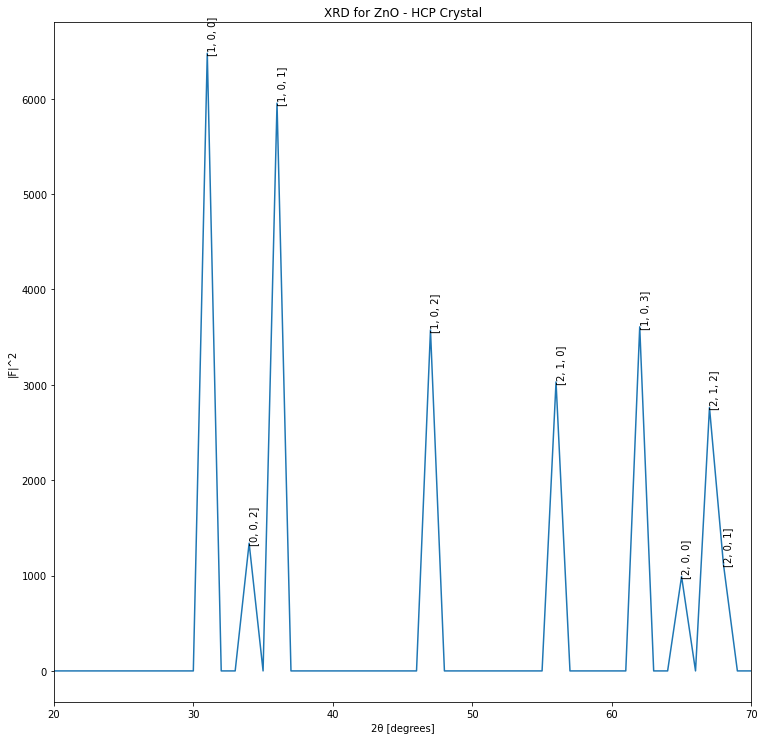

In [110]:
elem1 = "'Zn2+'"
elem2 = "'O'"
lp_a = 3.289
lp_c = 5.307
atom_pos1 = [[0.333330, 0.6666667, 0],[0.666670,0.333340, 0.5]]
atom_pos2 = [[0.333330, 0.666670, 0.382000],[0.666670, 0.333340, 0.882000]]
t2 = np.arange(0, 112 , 0.1) #x_value for plot
final_results, hkl_hits = hcp_2(atom_pos1, atom_pos2, h_list, k_list, l_list, elem1, elem2, lambda_xray, lp_a, lp_c) #y_value for plot, labels

x_min, x_max = 20,70
fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")  
plt.title("XRD for ZnO - HCP Crystal")
plt.rcParams["figure.figsize"]=(10, 10)
for i in hkl_hits:
    if i[0] > x_max:
        continue
    else:
        plt.text(i[0], final_results[i[0]], i[1],rotation = 'vertical')

plt.plot(t2*10, final_results) 
plt.xlim([x_min,x_max])

<img style="float: left;" src="372505.fig.001.jpg" alt="Drawing" style="width: 6000px;"/>

source (10)


Sources:
1. https://serc.carleton.edu/research_education/geochemsheets/techniques/XRD.html
2. https://xrd.co/component-parts-x-ray-diffractometer/
3. https://www.doitpoms.ac.uk/tlplib/xray-diffraction/powder.php
4. http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/bragg.html
5. https://materialsproject.org/
6. https://arxiv.org/ftp/arxiv/papers/1111/1111.0260.pdf
7. http://lampx.tugraz.at/~hadley/ss1/crystaldiffraction/atomicformfactors/formfactors.php
8.https://www.scirp.org/html/11-2200256_16798.htm
9. https://www.google.com/search?q=nacl+x-ray+diffraction+pattern+bragitoff&tbm=isch&ved=2ahUKEwjKsIHp7Nb0AhXgJjQIHfLrB3EQ2-cCegQIABAA&oq=nacl+x-ray+diffraction+pattern+bragitoff&gs_lcp=CgNpbWcQAzoHCCMQ7wMQJzoGCAAQCBAeUP8GWJMiYN4iaAJwAHgAgAGmAYgB7QeSAQQxMS4xmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=KgiyYcrzNeDN0PEP8tefiAc&bih=1240&biw=2560#imgrc=uOmjHXCxjibkYM
10. https://www.hindawi.com/journals/isrn/2012/372505/fig1/